### Import Libraries

In [ ]:
!pip install ibm_watson

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install langdetect

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import json
from langdetect import detect
import dateutil.parser

In [2]:
watson_nlu_api_key = '4QTMPXoLlXn3xTHemjeGJr20oIHi9Ak6XcxyW_P942hp'
watson_nlu_url = 'https://gateway-lon.watsonplatform.net/natural-language-understanding/api'

### Import Dataset

1. Customer Reviews Dataset

In [3]:
data = pd.read_csv("cust_reviews.csv")
data.head()

,id,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


## Setup Watson NLU

In [4]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 \
    import Features, EntitiesOptions, KeywordsOptions, SyntaxOptions, SyntaxOptionsTokens
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [5]:
authenticator = IAMAuthenticator(watson_nlu_api_key)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator
)

In [6]:
natural_language_understanding.set_service_url(watson_nlu_url)

### Understanding the data better

In [7]:
data.head(5)

,id,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [8]:
data.shape

(28332, 3)

### Summarize the data

In [9]:
data.describe()

,id,reviews.text,reviews.title
count,28332,28332,28332
unique,65,18168,10441
top,AVpgNzjwLJeJML43Kpxn,good,Five Stars
freq,8343,60,3937


#### There are 65 different Customers

In [191]:
uniqueCustomers = data['id'].unique()
len(uniqueCustomers)

65

#### We select five product review

In [34]:
reviewBySingleCustomer = data.loc[data['id'] == 'AVpgNzjwLJeJML43Kpxn']
productId1 = reviewBySingleCustomer[:527]
productId1.describe()

,id,reviews.text,reviews.title
count,527,527,527
unique,1,526,426
top,AVpgNzjwLJeJML43Kpxn,Great value,Batteries
freq,527,2,30


In [39]:
reviewBySingleCustomer = data.loc[data['id'] == 'AVpe7xlELJeJML43ypLz']
productId2 = reviewBySingleCustomer[:392]
productId2.describe()

,id,reviews.text,reviews.title
count,392,392,392
unique,1,391,361
top,AVpe7xlELJeJML43ypLz,As expected,Batteries
freq,392,2,12


In [40]:
reviewBySingleCustomer = data.loc[data['id'] == 'AVqVGWQDv8e3D1O-ldFr']
productId3 = reviewBySingleCustomer[:388]
productId3.describe()

,id,reviews.text,reviews.title
count,388,388,388
unique,1,388,308
top,AVqVGWQDv8e3D1O-ldFr,Purchased this for my wife during Christmas an...,Awesome
freq,388,1,17


In [41]:
reviewBySingleCustomer = data.loc[data['id'] == 'AVqkIhxunnc1JgDc3kg_']
productId4 = reviewBySingleCustomer[:488]
productId4.describe()

,id,reviews.text,reviews.title
count,488,488,488
unique,1,488,397
top,AVqkIhxunnc1JgDc3kg_,I bought this Kindle as a gift for my mother s...,Awesome
freq,488,1,18


In [42]:
reviewBySingleCustomer = data.loc[data['id'] == 'AVpfw2hvilAPnD_xh0rH']
productId5 = reviewBySingleCustomer[:484]
productId5.describe()

,id,reviews.text,reviews.title
count,484,484,484
unique,1,481,371
top,AVpfw2hvilAPnD_xh0rH,"A good starter tablet, but very very slow. Don...",Great
freq,484,2,31


In [43]:
uniqueProductReviews = pd.concat([productId1, productId2, productId3, productId4, productId5])

#### The customer reviews  for five products

In [44]:
uniqueProductReviews.head()

,id,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


#### has 2279 records

In [45]:
uniqueProductReviews.shape

(2279, 3)

In [46]:
uniqueProductReviews.describe()

,id,reviews.text,reviews.title
count,2279,2279,2279
unique,5,1830,1455
top,AVpgNzjwLJeJML43Kpxn,As expected,Awesome
freq,527,3,57


In [47]:
len(uniqueProductReviews['id'].unique())

5

### We then Pass the reviews from dataset one by one to get sentiments and emotions

In [48]:
sellerScores = []
emotionScores = []
for texts in uniqueProductReviews['reviews.text']:
    
    try:
        language = detect(texts)
    except:
        continue
        
    if language != 'en':
        continue
    
    wordLength = len(texts.split()) 
    print("\n"+texts+"\n", wordLength, sep="\t")
    
    if int(wordLength) < 5:
        continue
    
    response = natural_language_understanding.analyze(
        text=texts,
        features=Features(keywords=KeywordsOptions(sentiment=True,emotion=True,limit=2))).get_result()
    jsonResponse = json.dumps(response, indent=2)
    
    X = json.loads(jsonResponse)
    
    if not X["keywords"]:
        continue
       
    sentiment = X["keywords"][0]["sentiment"]
    if sentiment['score'] < 0:
        sentiment['score'] = 1 + sentiment['score']
    sentimentScore = sentiment['score']

    emotion = X["keywords"][0]["emotion"]
    emotions = [emotion["sadness"], emotion["joy"], emotion["fear"], emotion["disgust"], emotion["anger"]]

    j = 0
    position = 0
    emo = ''
    for i in emotions:
        if i > j:
            j = i
            index = position
        position += 1

    if index == 0:
        emo = 'sad'
    if index == 1:
        emo = 'joy'
    if index == 2:
        emo = 'fear'
    if index == 3:
        emo = 'disgust'
    if index == 4:
        emo = 'anger'

    emotionScore = j

    AveragedSum = (sentimentScore + emotionScore) / 2

    sellerScores.append(AveragedSum)
    emotionScores.append(emo)


I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
	31

Bulk is always the less expensive way to go for products like these
	13

Well they are not Duracell but for the price i am happy.
	12

Seem to work as well as name brand batteries at a much better price
	14

These batteries are very long lasting the price is great.
	10

Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again.
	48

ive not had any problame with these batteries have ordered them in the past been very pleased.
	17

Well if you are looking for cheap non-rechargeable batteries that last quite a while then these are perfect. Nothing more to say.
	22

These do not hold the amount of high power juice like energizer or duracell,


Amazing so far. These AAA's are even more affordable than the brands at WalMart. Will update if they end up not being good.
	23

I am happy to report that this order is working fine with no issues. I am very satisfied with this order and plan to buy again from same seller. Thank you. Jn
	32

AmazonBasics batteries are quite good in terms of capacity -- pretty much tied for the top spot compared to the other 6 brands I've tested, but other brands have the edge in capacity per dollar. When I computed value by dividing capacity by the cost per battery of the cheapest package size, they took a respectable third place, and they have the advantage of being a trusted name compared to the value leader. In the images I have attached a graph and a table summarizing my test results for the 7 types I've tested, but if you'd like to know more about how I test ... on to the in-dept test review.I've been on a bit of a quest to test all of the top-selling aaa batteries on Amazon in a repeatable, prec


A friend advised me to buy my batteries from Amazon. Her family swears by them. I am now using them and agree they are a good buy for the money and I am not worried about running out of batteries or running out to have to buy them.
	48

Batteries are pretty much of a commodity as long as they do what they're supposed to do, so I ordered these based on their price -- much cheaper than what you can buy in a store. And these batteries seem to last as long as any of the name brands. A good value.
	53

Everyone needs AA batteries. These are fine and a great price!
	11

so many batteries, so little money. A great deal
	9

Works great for everyday AA battery needs
	7

I got tired of running back and forth to the local store to buy a small package of batteries therefore, I decided to order these since the cost for all of these batteries were approximately the same cost for 6 batteries in a pack. The price was right and the batteries are working very well. This is really a bargain.
	60

Great 


I bought this for a friend.
	6

Never can have too many.
	5

So far I have had no complaints with these batteries. I was hesitate at first because they were cheaper than your big name brands. I figured they may not last long. But I was proven wrong. They have lasted just as long as the big name brands, and they are a lot cheaper. I buy these for work and for home. They do not disappoint me at either place.
	69

These Amazon AA batteries are great. They are just as good as any high priced battery.
	16

Yes, I'm using these and they are as good as any other battery.
	13

Good price and good product.
	5

I was very impressed with the packaging of these batteries. They work as well as any of the top commercial AA batteries. I will keep them handy for any future use.
	31

Another great offer from Amazon that delivers perfarmance and price for your electronic agenda 1
	15

These batteries are exactly what I was looking for. I was looking for affordable AA batteries with a long shelf life th


Damn that's a lot of batteries!
	6

Amazing product, love it. Used it first thing
	8

Love these, never had any problems and you can not beet the price! I not only buy them for home but also for my job.
	25

These are great. How is Duracell still in business
	9

Using in my Xbox One controller. Battery life is on-par w/ Energizer and Duracell, and like a zillion times cheaper.
	20

Amazing and affordable.
	3

I don't think I'll ever buy duracell again
	8

Amazing deal on these batteries! We have six kids so we are always needing batteries for something - whether it be a game, or a computer mouse, or whatever ... we always need a good stock of batteries. As far as holding up and doing the job, they seem to be doing great! I will update if I find any problems. So far, so good. Will need to buy more once Christmas gets closer.
	74

AMAZING DEAL!!!So many batteries for an amazing price!!! In the stores, you get half the amount of batteries for double the price.100 will re buy.work great. 


I use hundreds of AAAs annually, and despite the graphics in ad, these are about the poorest performing, with least longevity, of any I have bought. Still have another 100 of these, but will likely go thru those quickly.
	39

I'll never buy another brand again. Amazon batteries last! Quality and affordable!
	12

What else can you say Amazon ROCKS and so do their batteries!!!
	12

HOPE THEY WORK!
	3

First of all- buying batteries is never fun . It's also quite expensive. I fell in love with the fact , I could buy these Amazon branded batteries through prime and get them in two days .But guess what. I got them in 1 day!!! Plus , I stocked up for all those dang Christmas toys for my triplets. If I buy one, I have to buy three!!!!They lasted just as long as a standard battery . Plus , I love that they come in a nice cardboard sleeve. Rather than the ones at the store where they all fall out when you rip the plastic from the cardboard.To wrap up- these were very impressive.
	115

These wo


We order batteries keep them stocked at all times. We also order AAA Batteries for the same reason.
	18

No issues with these batteries. I've started buying all of my batteries from AmazonBasics, especially the AmazonBasics C Cell Everyday Alkaline Batteries (12-Pack) for the holidays and AmazonBasics AAA Performance Alkaline Batteries (20-Pack) for everyday items.Bottom line: I would recommend this to a friend.
	44

These are great. I used to have to go to Costco to get the equivalent number of batteries at a discount. Now I can get these batteries in a couple of days from Amazon.
	34

I've been impressed with the performance and quality of AmazonBasics battery. Though the price point is pretty low, don't let that fool you - they are every bit as long-lasting and durable as the brand-named batteries on the market. In my opinion, there's no reason to spend more on a battery because of it being a name that you're familiar because I can tell you that my experience has been amazing. And 


As it should be...AAA Alkaline battery. Can't beat the price and quality. Holds up well to its competitors. This is a no brainer if you like to save money.
	29

I love Amazon basics batteries. They last a long time and are cheap. Plus the packaging is convenient.
	18

These work as well as any standard-type batteries on the market. They last just as long as the name brand batteries. I don't know how well they store because I have been giving a lot to kids who had inferior batteries in their handhelds. I ran out that way. They use those handhelds constantly, but they haven't had to replace any of the batteries I gave them (it's been a couple of months). Other devices have had these batteries for six months, now, and are going strong.
	87

Great price and they seem to last as long as name brands.
	12

These are just as good as any other battery as far as I can tell but cost far less. Great option if you use lots of batteries! Tired of the store ripping me off when I need a couple.
	39




Great for the price
	4

Ordering more. What's that tell you
	6

What a deal! Awesome now I always have plenty of batteries at home. Also this was a very good value for the money.
	23

Love these batt's! Long life! works great in toys all other items!
	12

Awesome for cold/iced drinks! Keeps ice cubes from melting fast. Love this product! I wish they have a set for each design though.
	23

They seem to be holding up just as well as the top battery brands, for a fraction of the cost! Another great product from AmazonBasics-I will be hunting for their other products now!
	33

awesome price for decent batteries. they hold up fairly well, haven't run them through any rigorous tests, but when I put them in the remote control it seems to work again.
	31

Awesome price, awesome batteries. I will never buy batteries anywhere else again, this deal is hard to beat.
	18

Batteries are what you expect. They work. Price is awesome
	10

Tried these for the first time last night. Played indoor with m


Love these, I go through the batteries so nice to get more for my money.
	15

Nice flat packaging. They work for a long time.
	9

Pretty sure these batteries are way better the name brand batteries! Don't get sacked into name brand when you can get just the same from the amazon store a
	29

Standard batteries. Comes in a nice little box.
	8

The product came on time and as described. I am glad I bought this! I always research before I buy and this was a good deal.
	26

They are batteries, what can I say. Bought as gifts to go along with the candles.
	16

They are batteries... They do last a while though in the R/C toys we got for x-mas. I would buy these again over more expensive name brands.
	27

They make things work!
	4

They work well
	3

They're batteries. They work. Simple as that.
	7

This is the item I was looking
	7

Very happy with purchase, very powerful.
	6

Work as described
	3

Work great
	2

Works great and last a long time some of them are still working
	13

Works like


Good deal on a great product!
	6

AmazonBasics AA batteries save me a lot of time and money going to the store and buying them pack by pack, it is very cost efficient to but these for my budget friendly family of 5.I love that this is a big pack of batteries, 20 in all making the price drop down to about .38 cents a battery. I use these in everyday things from remotes, to flash lights. They work just as good as the more expensive batteries saving me lots of cash.I turn to the AmazonBasics brand when it comes to all of my office needs. I can't complain about any of their products I bought so far. Now it's time to buy a big pack of AAA batteries from AmazonBasics. I highly recommend these batteries to anyone out there looking to buy a great quality pack of batteries. These are great for products that have a highly running life like babies products or toys. They defiantly can keep up with my family without wasting ton of money.
	171

AmazonBasics batteries are quite good in terms of capa


The most batteries for the lowest price. I have not comprehensively tested these for longevity, but like the ferocious Zerg, their sheer numbers can dominate other units.
	27

A lot of batteries for a great price, i bet you will never see that at a supermarket! Thank you AmazonBasics!
	21

I happen to have remote controls in our house and this item certainly is a must in my living room.
	20

You know you need them, so why not get a bunch. I'm the battery guy for the kids toys, so I have to keep them on hand at all times!
	30

Worked exactly as they are supposed to, good price, good quality. lasting a nice long time, A good buy.
	19

A good deal, well packed in reusable package
	8

Seem to work fone for a fraction of the price!
	10

So far, so good. Great bundle for a good price.
	10

great batteries at a great price. I ordered them and they arrived the next day too!
	16

These batteries are as good or better than any brand of alkaline battery on the market today.
	17

A great deal for


Batteries can be expensive! However, Amazon has taken the opportunity to sell a good quality product. There are plenty of batteries for the cost, and in these times of uncertainty we need to be prepared for our family. During times of power outage batteries are so comforting because they allow us to maintain a sense comfort. They also sell these in triple a, c, and d. The price is good compared to other brands, and the quality of Amazon is backing the product. Safe and good buy for any consumer.
	90

Perfectly sent perfectly usable
	4

I just love Amazon's batteries. They last just as long as the name brand batteries, but are much less expensive.
	20

Arrived quickly,great price seem to be high quality so far
	10

Everything we have around the house uses batteries, so we go through them fast. I like purchasing in bulk because I don't have to purchase them as often and they are a little cheaper that way. I was a little nervous to purchase the AmazonBasics brand, because I wanted to mak


Works with everything and has good battery life.
	8

Great size pack of batteries for a great price! Thank you!
	11

Awesome little batteries for flashlights, remote controls etc. They always have the greatest deals on Amazon and Amazon prime especially. I love the fact that you can get batteries at an awesome price in a hurry when store prices are ridiculous.
	41

Amazon Basics - you are my hero. These are great batteries. I use them in my Apple keyboard and mouse and they have outlasted the brandname batteries I used to use. I get on average an additional 1-2 weeks of use out of each set of batteries which is an additional money saver. The shelf life seems to be normal for alkaline batteries.The packaging is biodegradable which adds to the convenience and value.
	73

Bye bye big name, expensive batteries!! Holy moly! I never knew that Amazon sold batteries. In all the years I've been shopping here! I came across these while searching for batteries to use with my son's toys (they all


They are batteries... They do last a while though in the R/C toys we got for x-mas. I would buy these again over more expensive name brands.
	27

They're batteries. They work. Simple as that.
	7

Work
	1

Works like they should.
	4

Batteries are awesome!! They are cost effective and last just as long as Energizer or Duracell. I have used these in both low drain (toys and small electronics) as well as high drain devices (Cameras and high powered LED flashlights). Using the Subscribe and Save makes them even more cost effective.
	51

Batteries are larger than normal and do not fit my audio gear or guitars... if you need these for sound or audio I'd pass...
	24

Batteries are very good, but packaging is horrendous, which is surprising because usually Amazon does a great job with hassle free packaging, but every four bats are packaged in tough plastic. Would have been better to just place the lot of bats in a simple box without the individual plastic wrap. Will not buy again with this pa


i am ready to do a full review on this product.Sins the package arrived in my house, i immediately take 2 aa battery and put it to my mac mouse,believe me mac mouse is 24/7 in use and it got me thru for 1 month and 1 week FEB / 19 - MAR / 25-26really good product
	57

Great batteries for a awesome price. Could not ask for more.
	11

Great price and works fantastic
	5

These batteries have a lot of power.My calculate acts like its on steroids.
	13

Best Battery Deal! They last as long as Duracell and Energizer!
	11

These test full charge while the ones i have been buying are already partially discharged bc u cannot tell how fresh they r, even when they are adv as good for 10 yrs.
	33

Another great product from amazon. I also use their rechargeable AA batteries which last a lot longer than any Energizer or Duracell that I have ever used. When it comes to any common battery size (AA, AAA, C, D, etc.), I will only be using AmazonBasics. Give this product a try and you won't be disappoin


batteries are stupid expensive in the store. Everything seems to take AA batteries now (remotes, video game controllers, kids toys, etc), so buy in bulk online and save.
	28

I have encountered several AmazonBasics batteries lately which were dead on arrival. Since they are cheap, I just throw them in the trash and try some more. However this is concerning. If this occurs much more I will stop using them and purchase more traditional, reliable brands. Simply beware when you purchase these, some bad ones may be mixed in the batch.
	62

I just went to use these for the first time... and they exploded in the remote I put them in! Literally, a loud pop and a black liquid was leaking out into my remote and all over my hands. Needless to say, it scared me to death!
	47

I have quickly become a fan of Amazon Basics products. You just can't beat the price and quality. These batteries run just as long as the Duracell's I had before this purchase. I bought these based on the reviews and because


Great deal on these batteries. They are a quality product! I'm not sure why anyone would spend more just to get a more recognized name brand. These AmazonBasics are great, last as long as the big name brands, and I like the way they come packed, too.
	47

Great batteries and a really good price. So far I have been very impressed with the value you get when you buy any AmazonBasics item.
	25

I bought a box of batteries to use in birthday and Christmas presents for the kids. You would never know these weren't big name batteries. They last just as long as the ones you'd buy at big box store, but cost so much less. I haven't used any yet that seemed to die long before they should have.The batteries come in a slim cardboard box which is easy for storing. My only complaint is that they are plastic wrapped in sets of 4 inside the cardboard. While this does make it easy if I have to grab some to take with me, it seems a tad environmentally unfriendly and the plastic is tightly wrapped, makin


Love this when I'm doing my makeup. it was a lot larger than I expected which I really loved! The only con I found is that it is TOO BRIGHT. When I first used it, my eyes and head hurt because of the brightness. But overall, this is a great product.
	51

Just put them in 3 days ago and already dead. Going with the name brand next time.
	17

These batteries die quickly!
	4

While there are some apps that are missing due to not using the Google Play Store the list is minimal. The tablet itself is quick, responsive, and noticeable nicer than the 7" fire. Picked this up when it was on sale for black friday sales. It's great for in front of the TV and catching up on email and light web browsing.
	62

I bought one last year for one cousin and had to continue for another this year. Great buy imo.
	19

I will try again for the 3rd time with my new Amazon Fire. It seems to have nice upgrades.
	19

bought this for my father, who never did much on computers and was not sure he would actually use


If ads dont bother you, then this may be a decent device. Purchased this for my kid and it was loaded down with so much spam, it kept loading it up making it slow and laggy. Plus the carrasoul loadout makes it hard to navigate for kids, not very kid friendly! Oh you can pay $15 to remove the ads but it wont remove them all. Buy the samsung, better everything!
	71

Great product for my 8 year & affordable.. had 2 months & no problems
	14

Bought for my 7 yr old. Quality product at an affordable price. Bought on sale for $69.99.
	17

Affordable and kid friendly. My kids watch videos and play games on these a lot. Lots of apps, games and books to choose from!
	24

Beautiful screen, vibrant color, fast and best quality for the money.
	11

The kids more expensive tablets died twice. Repair was more than the Fire brand new.
	15

this was great buy & can do it all.fair price & great games
	13

This my second kindle .. it's light and faster than my previous kindle ..came with free audio books


This Kindle is larger than my old one and book reading is much easier. Some features I don't use so can't comment on them. All in all I love it.The only drawback was that the store had no covers that fit this Kindle.
	43

If you're looking for a small but effective tablet that's reasonably priced, this tablet is the one for you. It's easy to understand the directions, therefore making it a snap to learn how to work the tablet. It comes in different colors and is easy to read and use. Give it a try. Thanks, Best Buy!!!
	56

Does not let me connect with my library. Very diapointed
	10

Love best buy and I shop at Best Buy I always buy my TV for me and my kids I buy my kids tablets at Best Buy Love Best Buy
	30

I bought this for my son and I couldn't be happier. I would definitely recommend this product to family and friends
	21

Enjoy the Kindle, fun games, can access the Internet, read books, etc.
	12

Great 8 inches tablet with and amazing storage for apps.
	10

Great Product and gre


Bought this as a gift for my mom and this was to replace her original Kindle Fire. She's have had a month now and is loving and no problems with it.
	31

bought for husband and he was surprised it does the work he needs it for
	15

This was a perfect gift for the holidays! I saw the reviews on this and immediately had to get it!
	20

Awesome tablet and great value for money. My son is enjoying it a lot.
	14

Great over all Tablet! Good build quality, but cheap enough for the kids to use / loose. Really a plus for travel. Install VLC media player from the amazon app store, and then you have unlimited movie options for up to12 hours. Add some head phones and that 6 hour trip to Disneyland, well it's so much more tranquil for the adults.
	62

Product worked as described. No issues with performance, and it was a simple setup! Perfect for web browsing and videos.
	20

If you don't want or need something cheaper than an iPad but of quality, this is a great happy medium.The processor makes f


Love the tablet mainly use for games and internet. Grrat product foe the price.
	14

This is the second Fire tablet that I have purchased. The first I returned in after I was not able to load YouTube onto the tablet. Amazon's take on Android was just to unfriendly to make it work. With this new tablet, Amazon has heard my concern and now I'm enjoying this tablet. It's well built for a sub-$100 device, but won't stand up to a lot of abuse.
	69

Purchased this for my wife during Christmas and got a great deal on it. Compared to the older version that she has this model is faster, brighter, and more convenient with Alexa. I would recommend this product looking for a tablet with lots of features packed in it.
	48

Great little device that does almost everything a Tablet does. I use it as my computer when I travel as well as a reader.
	24

I purchased the Fire Tablet basically as an e-reader. However, after finding out how to install the Google Play Store, it is much more. Nothing speedy o


I can do a lot of things on my Kindle I used to rely on the computer for.
	18

Works very well. Easy to carry around & connect to wifi.
	11

Bought as a gift to my dad and he likes it so far. It's fast enough for apps and great for reading
	22

great product at a great price.i like the builtin filter which is easy on youreyes.probably the best reader under 100 dollars.
	21

Bought this for my husband at Christmas. He is VERY happy with it and It keeps him out of my hair. Bought one for our young son too. Now i can breathe. LOL. We've had no issues with them and has more than met our expectations. Well worth the money & a VERY good deal!
	55

I bought this to replace a 3-year old Kindle Fire 7" HDX that I had just dropped on the floor. I sort of panicked, so after doing a couple of hours of research I picked this tablet. Just to be on the safe side I got 16 additional GB of memory. I installed a couple of games (none of them memory hogs) and a cookbook app, in addition to downloading a


Tablet is perfect for beginners who just want basic
	9

Needed a present for mom, at first she didn't use it much cause she had to set it up but now it's great and she loves it.
	27

This tablet is easy to set up, has great resolution, and is perfect for reading books or surfing. The price is affordable, too. It is perfect for anyone who wants a fun and casual way to use technology.
	38

It's easy and intuitive. The only criticism is that it should be easier to go right into an application, instead of watching an advertisement, then having to figure out how to exit it
	33

Really enjoy this product. Love watching movies and playing games on my Fire HD 8
	15

suggested by the sales associate I'm glad I took his suggestion
	11

We bought this for my Mother in Law for Mother's Day. She's not very tech but she's had no problem using.
	21

We bought this for my Mother in law who isn't very tech savvy. She has no problems using
	18

I was in the middle of moving and didnt want to get a new 


Works great with my amazon prime account and for browsing Internet and playing game. Cheap tablet as well.
	18

This is my second Kindle and I love it. It's lightweight, simple, and fast. It's convenient for trips and fits in my bag without weighing it down.
	27

Was looking for tablet to read books and this is perfect for that.
	13

I "retired" an earlier version and this new souped up model more than meets my needs, and the battery lasts so much longer!!
	23

I initially bought the tablet for school, I use Kindle to rent books but after using it to stream Xfinity, Netflix, and Amazon Prime I loved the sound and picture quality. I would recommend this to anyone needing a good low cost tablet with great battery life.
	47

It's easy to use and my son likes to play on it alot
	13

Simply does everything I need. Thank youAnd silk works wonders
	10

The Unit works exactly as described. A very good buy.
	10

As expected. I am very happy with this. This serves the purpose
	12

Excellent pro


The tablet is not for me it is for a Christmas gift
	12

This Fire HD 8 is my first such device. I find it to be easy to operate and very responsive.The touch screen control takes getting used to as I often click on the wrong close part of the screen and have to go back. The Alexa voice assistant surprised me when she announcedherself over the speaker. (I shut her off since I'm not a fan of conversing with computers).My main complaint is that comes with nothing but a charger and cable. The wordless, pictorialstart up instructions were primitive and vague. There are no instructions on how to use thisdevice; no sample book to test and get familiar with. There is a help function thatfills in some basics of functionality but not thorough enough. The WiFi connectivity is great, using the latest protocol and encryption. It has a simple web browser but web time also seems to be the greatest drain on the battery. The cable can be used toattach to a Windows PC and transfer files (books, music,


Loved the product. First I was disappointed that I could not download Google Store apps but a Quick Google Search fixed that Issue and now I can download any Google Store Apps. The Battery Life is amazing as I was able to Watch around 4 Full Movies on a Single Charge. Performance is great as Games like Marvel Champions Modern Strike Online had no issues. Able to add an SD Card is just perfect as I dont have to worry about Storage for downloading Movies or Apps. Speakers are better then my Samsung Galaxy S7. For the Price point of this Tablet there is not a single thing to Complain. If I have to Brightness of the Screen can be better.
	121

The best product for the money. East to use, great color, great features. easy to set up and battery life is great.
	22

I didn't expect anything less than what I got with this Kindle.
	12

its the best tablet that you can buy for the price and you can add a memory card to it.
	20

Tablet stopped working after owning for two weeks. Came back on afte


I love the apps that are on here and everything else I think it's the perfect tablet for a beginner has all of the apps that you will need
	29

I recently upgraded to this tablet; it is everything I wanted. Highly recommend!
	13

Easy to use and navigate. Great for watching movies and videos!!
	11

Able to download music and movies free!!!!!!!!!!!!
	7

I bought this tab for my daughter's birthday.its got a good screen and sound for the price. I also play for the children's app freetime which is perfect for her.
	30

Great tablet for on the go. Good size screen to watch movies or read book.
	15

Very bright display, speedy processor, and solid feel. Impressed.
	9

Very user friendly and straight forward instructions great for all ages
	11

Works very well. Cheaper than an iPad and works great for apps and video.
	14

Enjoy having the kindle. My son uses all the time for reading. It has helped him improve in his reading skills. We are glad we bought it. Thank you.
	29

My husband and I 


This is such a wonderful value for the money!!Clear display with great color!!
	13

Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...
	26

I'm new to tablets but this one is pretty easy to understand and use.There's a decent amounts of apps at start up, which can be good and bad.
	28

Long battery life, good screen, reasonably fast. Alexa.
	8

very good product in its price range affordable and very good
	11

We've had three of these Kindles. They are well built and you can't get the quality in a tablet from any other manufacturer. Amazon has great support with them.
	29

This tablet is great! Nice display, and you get the amazon eco-system. Now you can also download google play easily, so you have the best of both worlds.
	28

Amazon Fire HD8 is a great product for the price. I picked it up for $69 during the holiday shopping season. Replacing a 1st gen Samsung Tab 2. This thing is sooo much faster. Per


Love the tablet mainly use for games and internet. Grrat product foe the price.
	14

Purchased this for my wife during Christmas and got a great deal on it. Compared to the older version that she has this model is faster, brighter, and more convenient with Alexa. I would recommend this product looking for a tablet with lots of features packed in it.
	48

Won the kindle fire 6 last xmas2015 at work raffle. Gladly got this kindle fire 8 for a bigger screen and better battery life. Love it.
	26

Improved over the HD 7. Things set up differently but not hard to learn. Also a bit heavier than the 7 so reading in bed a little harder
	28

Got this for my wife. She loves the bigger screen and the better app management features that this one has over her earlier generation kindle. Definitely worth it!
	28

Bought this for my wife to replace her old one and she loved it
	14

My bf got me this as a birthday present from my son. It's just like my 7" although larger. I cannot tell the different be


Christmas gifts for 2 granddaughters. They loved there first ones. time for a update
	14

Bought this kindle for my dad for Christmas. He loves it.
	11

my kids enjoy the Fire HD and they love the picture quality
	12

This was a gift for grandchildren. I am sure they will love, seeing they used the older one we have.
	20

Works great. Easy conversion for an aging guy without much technological experience.
	12

Great upgrade from Kindle Fire. Reasonably priced for product.
	9

I got a magenta color because I loved the beautiful purple-ish color shown on the picture. Instead I got a really bright pink-ish color which looks nothing like the color shown here. I went to the store hoping to replace it with a different color but was told that since I bought it on sale, I had to pay the $30 dollar price difference if I wanted to exchange. Unbelievable. The product is good but I never liked the Best buy customer service.
	83

Great for taking on trips. 16 GB, camera, computer
	9

I can do a lo


BY FAR THE BEST TABLET IVE EVER OWNED, EASY AND QUICK SET UP
	13

Bought for someone not tech savvy and he's done great
	10

Bought this for my son and he absolutely loves it!
	10

Easy to use and has a lot of games and books available. Good memory and you can't beat the price!
	20

Easy to use, like lighted screen for reading in dark
	10

Fun and reliable. Good quality for the money. Easy to use.
	11

Great for reading - nice image, easy on the eyes and lightweight.
	12

Has all of the functions of the expensive iPads and works great for fraction of the cost!!!
	17

I bought this for my mom and she loves it. She said it is really easy to use and loves the lighting, it's easy for her to read.
	28

I bought this for my mother for Christmas. She is not the most technological advanced individual. She really wanted a tablet and this one works great and is super easy to use. I went to program it for her and she insisted on doing it herself. She was able to no problem!
	52

I love my kindle


Very good for kids to learn and play games and research school work.
	13

Purchased as a door prize gift given with a one year Amazon membership. The recipient loves it and says it performs very well. (As a past Amazon Fire user, now i-Pad graduate, I loved my Amazon Fire for more than 4 years without any problems. In fact, I just recycled it on to my son and it runs like a champ).
	61

Great for reading books. Does everything an iPad or tablet does.
	11

This is the perfect tablet for basic use or if upgrading from the kids edition of the Amazon Fire. Much less expensive than an iPad and more durable if you have a tween who isn't always careful with their tech.
	40

Got it for $60 during black Friday. I also have 7inch fire tablet. For few more bucks this tablet is way better than the 7 inch non HD fire.
	29

We bought this for our three daughters! Got a kid proof case and added free time for a low monthly fee and couldn't be happier! So much better than worrying about them breaking 


Excellent tablet with nice screen. I wish Amazon would pre install the play store, this would have been perfect.
	19

Like the ability to play a game or 2 when I take a break from reading...
	16

Works well. Easy to use. I like the auto on when you open the case
	15

The size of this table is great I'm able to carry it in my purse with no problem!
	18

great tablet, simple to use, just love it.compatible with other amazon products.
	12

I lost my tablet in Germany and wanted a replacement fast. Best Buy, had both the 7 and 8 inch Kindle fires in stock, after reading the reviews, I decided to go with the 8 inch. Boy was I glad that I did, the larger viewing area, is great for watching movies and Netflix on the airplane. The 8 inch has stereo sound , unlike the 7 inch which has only mono. Overall I am really happy with this tablet
	80

I purchased this as alight weight replacement for my laptop. It has accomplished everything I needed. I'm sure there will be something's I still need HP 


I liked the volume buttons on the side of my old 7" Fire better than on top like this new 8". That's the only reason I didn't give it a 5 star rating.
	33

I'm sorry I didn't buy it sooner! Very easy to use. Love it.
	13

With a $20 off deal last blackfriday, who will not get it. Much clearer and faster than the other fire HD. Light weight too
	24

I am so impressed with this tablet. My seven year old loves its app, gaming and e-reader functions.
	18

Great for reading e-mail, pictures or viewing internet.
	8

bought this for my elderly mother to play games, get email and pics via Instagram, etc. now she's a geek! easy to use, even for a novice and very reasonably priced. Great buy, highly recommend this.
	36

My husband and I both use this and really love it. We got kindle unlimited for the books but it's also great for playing games and surfing the web too.
	30

I love my Amazon fire. I purchased one for my 17 year ol and she uses it to view Netflix,Hulu and you tube. I shop,email, 


First experience with a tablet for my husband who likes it and uses it all the time. We like it.
	20

Bought for the daughter for Christmas and seems to work great
	11

I installed a driver for google play store; also I payed amazon to get rid of the lock screen ads ($15). It was worth it. I use this thing alot.
	30

Great size, easy to carry for traveling. Need to spend more time Looking into apps for contact manegement, interactive calenders and most important, music storage and use.
	27

I need a tablet for reading ebooks and search dictionary for new vocabulary. This one fit my need and it can also check email, listen music and go online searching stuff. I have iPad at home and put this at office, so I don't need to bring the same tablet back and forth. It suits my need very well.
	59

She says this was the best gift she ever received.
	10

purchased for a little guy, and i am very pleased with it!!
	12

Excellent value for my 3 yr old, everything you need plus HD and the wife can


Great for kids. Bought both colors for two of my kids.
	11

Great fun r the little ones, had to go buy another because it works so well! Dropped many times and still is doing well!
	24

Great quality, great price and best of all has good sound.
	11

Great tablet for kids very entertaining and informative for kids learning
	11

Great tablet with good parental controls for kids!!
	8

Have had other products similar for the kids but this is the best by far. Best Buy had a great price too so decided to try it. Love it.
	29

I was a slightly skeptical about giving this to my 1 year old but it has been a fantastic, durable learning tool for him and he is progressing very quick.
	30

My 4 year old loves it. I love that she can use it unsupervised without worry. She has been learning her alphabet and this has been a great tool.
	29

My grand baby is two years old and she absolutely loves it!
	12

My great granddaughter loves it. Easy to use and it holds the charge well.
	14

My little 8 year 


I needed this for my daughter and needed a tablet that cal handle all my daughters apps and have parental saggy This has it all
	25

This is great if you have two kids and want to give them a tablet to play with. My problem is that my child is dyslexic and this is the lowest level reader that currently supports audible.com... that is the hardware supports audible. In order for my child to use audible I had to disable all of the family features and try to turn it into a reader... I was sad because there are lots of great family features that I had to disable.I did not use geek squad, I reached out directly to kindle support. Pre-sales, they could not tell me the difference between the free and paid family packages. I had to get to a senior person to help me figure be out why audible did not work and the to disable the family features ... even then, I could not disable the Alexa app. My child has full access to Alexa and the rights to turn on shopping.... kind of scary.So my disappointm


My grandson really enjoys his new Kindle that he for for a Christmas present.
	14

great learning tool for my granddaughter. she loves it.
	9

This is the way to go for an all-in-one package for the kids. Everything is set-up and easily controlled through adult log in...
	23

This was a starter Kindle for my grandson. Since I already have a Kindle Fire Tablet that I love, I had no hesitation buying this for someone else. I chose this tablet because of the childproof case and the extended replacement warranty since the gift was for an adolescent boy.
	50

This was a Christmas present for my niece, she loved it.
	11

So far it begin good for my 4yrs old toddler. She enjoy every minute of it.The parental control it's a plus. It also allow you to make multiple kid and adults profiles without any problems issues.
	36

The reviews on this on Amazon seemed awesome. Little did I know that there is a chronic problem with the port on these tablets. We just bought this for Christmas and went to 


This was a gift for a 4 year old who was enjoying it immediately with very little adult assistance required. Haven't used it myself, but probably won't, its for kids! Good purchase.
	32

Easy and age appropriate. Can set timers for tv and movie watching my granddaughter finds the educational games more interesting and fun.
	22

Bought this for my granddaughter for Christmas. She is special needs and so far she shows an interest in the movies and games included on this tablet. She is able to easily use it with minimum assistance.
	37

Bought this for my young granddaughter. It is so easy for her to use. We can control the content. She is learning her colors and alphabet with the help of this tablet. Lots of free content. It was easy to connect to the home wifi. Great battery life.
	48

Easy to use. Great for kids. Great for mom when kids steal mom's phone. Lightweight. Great protective case. But it gets really dirty, real quick.
	25

Kids love it. Easy for them to use. Only issue is th


My wife and I wanted our children to still enjoy the feeling of having an "iPad", so we got the Amazon Fire Kids edition. It has been awesome. I love the way you can set limits on the tablet so they're not glued to it all day long. Kids mode is extremely beneficial.
	53

Bought this for my six year old grandson. The set up was very easy. He is able to download kids only stuff and can send us videos of himself using the app. He just loves it. Truly kid friendly.
	39

The Amazon Fire for Kids is an excellent starter tablet. The supporting games and apps are exceptional. Use of tablet is simple and non-intimidating.
	24

My son loves this tablet. It is easy for him to navigate and extremely durable.
	15

I bought this for my granddaughter who is 2 and was able to load all the apps and books as well as her Disney movies. So far she has been unable to access anything that I don't want her to. And it has been able to withstand frequent toddler abuse.. Aka.. Throwing it. Definitely recommend


love it great for kids my son loves it and wont put it down
	14

My daughter love it and is amazing thanks and I will recommend it
	13

It is well designed with a safe cover for kids. It also come with 2 year warranty. My son loves it already.
	22

My 5 year old grandson really enjoys his new tablet. He's had it for several months. The only negative I see is the charge port is starting to get loose. The small plug is maybe not robust enough for a 5 year old.
	43

Got this for my 3 year old son. He plays with it every now and then but it's good for introducing him to educational things. Glitchy at times but that's to be expected with how much it cost.
	38

my grandson had one and likes it. so i bought it for my other grandson
	15

A good starter tablet, but very very slow. Don't expect and I Pad savy child to enjoy this. But for a true beginner it would be fine.
	27

grandson really enjoys this and plays with it all the time
	11

I bought it for my 2 (almost 3) year old. He really love


This looked easy, but hard to setup if no experience with other than Apple products
	15

I enjoy the product. It was easy to program. My toddler pushed a button that changed the setting. I took the product to the store and the kind salesman corrected the product.
	32

My grandson really enjoyed this product. Good deal.
	8

Bought this for my 3 year old and it is great. Wish it had a bit more storage but overall very happy with my purchase.
	25

I bout this item for my granddaughter for Christmas. It has games that she enjoys playing The case protects the device very well. It also can be set up for age appropriate games etc. As she gets older you can change that. It is bigger than an iPod and smaller than an iPad and has a better price. Since it is a google device you can go there to get more apps
	72

I bought this for my 8year old son, he loves it just has very limited games on it
	18

My daughter loves it and so does my son and wife too.
	12

So read reviews on a few tablets but hon


I PURCHASED TWO FOR MY GRANDCHILDREN TO SHARE AND THEY ARE SO HAPPY WITH THEM, WHICH MAKES ME REALLY HAPPY! I NEED TO BUY HEAD PHONES NEXT!
	27

My grandkids plays with this tablet all the time.lots of videos and games
	13

I love the the Kindles!! Bought this for my grandson. Impressed with the 2 years no questions asked warranty.
	19

alot of great free educational gaming, reasonable price only downfall is sometimes it runs a tad slower than a tablet
	20

I love the fact that it can take a lick and keeping on ticking my grandson is a bit rough on things.
	22

Bought for my 2 yr old grandson.. and he loves it has a lot of learning numbers alphabet and shapes
	20

This is the fourth one of these that I have purchased. My grand children love them. Between the one year of programming and the two years of warranty, I don't think there is a better tablet on the market for children. Excellent product and it works very well with the children at what ever level they are at.
	58

Works great 

#### You can see scores and and emotions for 2124 records out of 2279 

This is because there were 155 records which were not understood by NLU and hence NLU had to discard them

In [49]:
print(sellerScores, emotionScores, sep = "\n\n")
print(len(sellerScores), len(emotionScores), sep = "\n\n")

[0.41378000000000004, 0.494734, 0.887298, 0.2536615, 0.6178845, 0.8003655000000001, 0.8227215, 0.7306555, 0.35005, 0.5779685, 0.422688, 0.26353649999999995, 0.8647279999999999, 0.611451, 0.5246255, 0.9067665, 0.343494, 0.534783, 0.7606710000000001, 0.18856649999999997, 0.5008775, 0.682992, 0.2494255, 0.361533, 0.188801, 0.468213, 0.8384784999999999, 0.8675539999999999, 0.25261999999999996, 0.27367, 0.6604734999999999, 0.636606, 0.26898449999999996, 0.690898, 0.533167, 0.3089995, 0.308638, 0.5505249999999999, 0.259145, 0.2261645, 0.2471645, 0.46963, 0.5313625, 0.5377625, 0.7123335, 0.31767599999999996, 0.0872485, 0.124615, 0.513685, 0.0759275, 0.41044800000000004, 0.774168, 0.022058, 0.890239, 0.21874649999999998, 0.8820535, 0.4827495, 0.5856089999999999, 0.7275615, 0.5922419999999999, 0.107418, 0.8214335, 0.23048149999999998, 0.8310485, 0.8040745, 0.5804155, 0.13188, 0.9291625, 0.4667295, 0.28553, 0.22428549999999997, 0.8887434999999999, 0.390178, 0.451205, 0.7605025, 0.765775499999999

### Understanding the seller scores better

In [50]:
sellerScoreDf = pd.DataFrame(sellerScores, columns=["sellerScore"])

### Rate the seller between 1 to 3

##### We Split 3 based on 25% (0.34), 50% (0.60) and 75% (0.81) 

In [53]:
sellerScoreDf.describe()

,sellerScore
count,2124.000000
mean,0.569538
std,0.264008
min,0.022058
25%,0.348248
50%,0.601153
75%,0.811665
max,0.991763


In [54]:
satisfactionScore = []
minimum = 0.022058
maximum = 0.991763
q1 = 0.348248
q2 = 0.601153
q3 = 0.811665

for individualScore in sellerScoreDf['sellerScore']:
    
    if individualScore >= minimum and individualScore <= q1:
        satisfactionScore.append(0)
    
    if individualScore > q1 and individualScore <= q2:
        satisfactionScore.append(1)
    
    if individualScore > q2 and individualScore <= q3:
        satisfactionScore.append(2)
    
    if individualScore > q3 and individualScore <= maximum:
        satisfactionScore.append(3)


In [55]:
print(len(satisfactionScore))

2124


In [60]:
ids = []
for items in uniqueProductReviews['id']:
    ids.append(items)
len(ids)

2279

In [61]:
for i in range(0, 155, 1):
    ids.pop(i)

In [62]:
len(ids)

2124

### We create the first dataset for our use, that is Seller Satisfaction Scores based on Customer Reviews.

In [63]:
sellerScoreDf.insert(0, 'id', ids)

In [64]:
sellerScoreDf.insert(1, 'emotion', emotionScores)

In [65]:
sellerScoreDf.insert(2, 'Customer_Review_Satisfaction', satisfactionScore)

In [66]:
dataset1 = sellerScoreDf
dataset1

,id,emotion,Customer_Review_Satisfaction,sellerScore
0,AVpgNzjwLJeJML43Kpxn,sad,1,0.413780
1,AVpgNzjwLJeJML43Kpxn,sad,1,0.494734
2,AVpgNzjwLJeJML43Kpxn,joy,3,0.887298
3,AVpgNzjwLJeJML43Kpxn,joy,0,0.253661
4,AVpgNzjwLJeJML43Kpxn,joy,2,0.617884
...,...,...,...,...
2119,AVpfw2hvilAPnD_xh0rH,joy,3,0.880039
2120,AVpfw2hvilAPnD_xh0rH,joy,2,0.688475
2121,AVpfw2hvilAPnD_xh0rH,joy,1,0.509608
2122,AVpfw2hvilAPnD_xh0rH,joy,0,0.237686


In [67]:
dataset1.to_csv('Customer_Review_Satisfaction.csv', encoding='utf-8', index=False)

### We Can Visualize the dataset

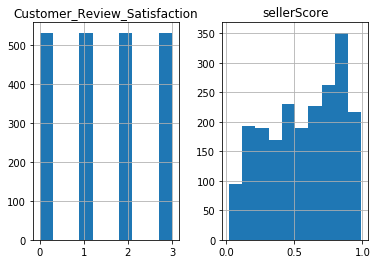

In [68]:
viz = sellerScoreDf[['sellerScore','Customer_Review_Satisfaction']]
viz.hist()
plt.show()

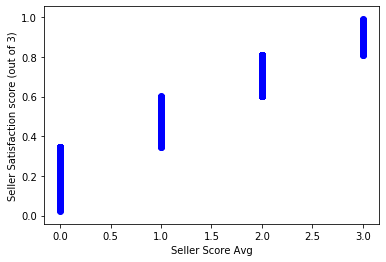

In [69]:
plt.scatter(sellerScoreDf.Customer_Review_Satisfaction, sellerScoreDf.sellerScore,  color='blue')
plt.xlabel("Seller Score Avg")
plt.ylabel("Seller Satisfaction score (out of 3)")
plt.show()

### Import Dataset

2. Customer orders Dataset

In [70]:
data2 = pd.read_csv('four_tables_joined.csv')
data2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,7e722bfc2987b03c9f86dc14857dabba,c4a875883036b34ff4fe78e2d66512d8,delivered,2017-04-24 17:58:57,2017-04-29 23:32:51,2017-05-05 15:27:11,2017-05-15 08:17:56,2017-05-23 00:00:00,1,3a3502ecc84a931af1064f5a82ed267a,...,58.0,1161.0,1.0,500.0,21.0,8.0,15.0,95913,lajeado,RS
1,298ee6136c29ce0b78bb3cc68591404a,99907fb65062e52496e146648f921649,delivered,2017-04-27 10:29:07,2017-04-28 11:45:43,2017-05-02 10:52:14,2017-05-06 06:42:13,2017-05-30 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS
2,94e050666a9b391d3aab71554fe12421,66631e40bb70105ec13118c26b650735,delivered,2017-04-26 14:54:02,2017-04-26 15:05:20,2017-05-02 11:27:33,2017-05-08 17:09:54,2017-05-16 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS
3,531a321dff7247e76a5f6c2e702faa99,bedacf9e38540811c6f18eb143f9e27c,delivered,2017-06-01 16:05:29,2017-06-03 02:25:22,2017-06-08 08:07:51,2017-06-12 13:54:46,2017-06-23 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS
4,99fe1f54d97630a40c549779ea00e8c9,fa124303523931c3e5f132f33e9110fe,delivered,2017-05-16 21:30:59,2017-05-16 21:45:16,2017-05-22 13:25:37,2017-05-31 08:18:34,2017-06-08 00:00:00,1,f1d3e7a4605f6cd5f2a3cf9bde5c7845,...,40.0,565.0,3.0,1000.0,31.0,6.0,33.0,95913,lajeado,RS


In [71]:
data2 = data2[['order_id', 'product_id' ,'order_status', 'order_estimated_delivery_date', 'order_delivered_customer_date']]
data2.head()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
0,7e722bfc2987b03c9f86dc14857dabba,3a3502ecc84a931af1064f5a82ed267a,delivered,2017-05-23 00:00:00,2017-05-15 08:17:56
1,298ee6136c29ce0b78bb3cc68591404a,f1d3e7a4605f6cd5f2a3cf9bde5c7845,delivered,2017-05-30 00:00:00,2017-05-06 06:42:13
2,94e050666a9b391d3aab71554fe12421,f1d3e7a4605f6cd5f2a3cf9bde5c7845,delivered,2017-05-16 00:00:00,2017-05-08 17:09:54
3,531a321dff7247e76a5f6c2e702faa99,f1d3e7a4605f6cd5f2a3cf9bde5c7845,delivered,2017-06-23 00:00:00,2017-06-12 13:54:46
4,99fe1f54d97630a40c549779ea00e8c9,f1d3e7a4605f6cd5f2a3cf9bde5c7845,delivered,2017-06-08 00:00:00,2017-05-31 08:18:34


### Understanding the Dataset better

In [72]:
data2.shape

(112650, 5)

In [73]:
data2.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,112650,112650,112650,112650,110196
unique,98666,32951,7,450,95664
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,delivered,2017-12-20 00:00:00,2017-07-31 18:03:02
freq,21,527,110197,604,21


#### There are total 7 types of order status

In [74]:
uniqueOrderStatus = data2['order_status'].unique()
print(uniqueOrderStatus)

['delivered' 'invoiced' 'shipped' 'canceled' 'processing' 'unavailable'
 'approved']


In [75]:
OrderStatus = []
for stat in uniqueOrderStatus:
    orderBySingleCustomerStatus = data2.loc[data2['order_status'] == stat]
    OrderStatus.append(len(orderBySingleCustomerStatus))

#### Breakdown of the order status
'delivered' -> 110197
'invoiced' -> 359
'shipped' -> 1185
'canceled' -> 542
'processing' -> 357
'unavailable' -> 7
'approved' -> 3

In [76]:
print(OrderStatus)

[110197, 359, 1185, 542, 357, 7, 3]


#### We select five products order details

In [77]:
orderBySingleCustomerStatus1 = data2.loc[data2['product_id'] == 'aca2eb7d00ea1a7b8ebd4e68314663af']
productId1 = orderBySingleCustomerStatus1
productId1.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,527,527,527,527,520
unique,431,1,2,145,425
top,bbeea8dfee8c14c1cf2d53c17971b6c6,aca2eb7d00ea1a7b8ebd4e68314663af,delivered,2018-02-02 00:00:00,2018-05-02 18:58:29
freq,4,527,520,16,4


In [78]:
orderBySingleCustomerStatus1 = data2.loc[data2['product_id'] == '389d119b48cf3043d311335e499d9c6b']
productId2 = orderBySingleCustomerStatus1
productId2.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,392,392,392,392,390
unique,311,1,3,172,309
top,9c4f3693a36ba481e0d9da739679660c,389d119b48cf3043d311335e499d9c6b,delivered,2017-12-18 00:00:00,2017-11-21 22:26:25
freq,6,392,390,8,6


In [79]:
orderBySingleCustomerStatus1 = data2.loc[data2['product_id'] == '368c6c730842d78016ad823897a372db']
productId3 = orderBySingleCustomerStatus1
productId3.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,388,388,388,388,388
unique,291,1,1,150,291
top,3789e9b1be0db55442c1ae8b24ab51ec,368c6c730842d78016ad823897a372db,delivered,2017-12-19 00:00:00,2018-01-23 15:35:18
freq,5,388,388,8,5


In [80]:
orderBySingleCustomerStatus1 = data2.loc[data2['product_id'] == '99a4788cb24856965c36a24e339b6058']
productId4 = orderBySingleCustomerStatus1
productId4.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,488,488,488,488,477
unique,467,1,4,228,456
top,fb532c8404467100e3f75ab03b3faae4,99a4788cb24856965c36a24e339b6058,delivered,2017-08-04 00:00:00,2017-06-29 12:44:46
freq,3,488,477,7,3


In [81]:
orderBySingleCustomerStatus1 = data2.loc[data2['product_id'] == '422879e10f46682990de24d770e7f83d']
productId5 = orderBySingleCustomerStatus1
productId5.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,484,484,484,484,484
unique,352,1,1,163,352
top,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,delivered,2018-01-08 00:00:00,2017-12-28 09:05:34
freq,14,484,484,16,14


In [82]:
uniqueOrderStatus = pd.concat([productId1, productId2, productId3, productId4, productId5])

In [83]:
uniqueOrderStatus.describe()

,order_id,product_id,order_status,order_estimated_delivery_date,order_delivered_customer_date
count,2279,2279,2279,2279,2259
unique,1834,5,4,332,1815
top,73c8ab38f07dc94389065f7eba4f297a,aca2eb7d00ea1a7b8ebd4e68314663af,delivered,2017-12-15 00:00:00,2017-12-28 09:05:34
freq,14,527,2259,31,14


In [84]:
len(uniqueOrderStatus['product_id'].unique())

5

#### Refactor `order_estimated_delivery_date`	& `order_delivered_customer_date` columns

In [85]:
allEstimatedDates = [dates for dates in uniqueOrderStatus['order_estimated_delivery_date']]
print(allEstimatedDates)

['2018-05-28 00:00:00', '2018-01-05 00:00:00', '2018-06-14 00:00:00', '2018-02-14 00:00:00', '2018-02-14 00:00:00', '2018-04-18 00:00:00', '2018-02-02 00:00:00', '2017-12-04 00:00:00', '2018-01-08 00:00:00', '2018-05-25 00:00:00', '2018-01-16 00:00:00', '2017-09-06 00:00:00', '2017-12-29 00:00:00', '2018-03-08 00:00:00', '2018-03-13 00:00:00', '2018-05-22 00:00:00', '2018-04-25 00:00:00', '2018-02-05 00:00:00', '2018-04-06 00:00:00', '2018-05-16 00:00:00', '2018-05-28 00:00:00', '2018-06-04 00:00:00', '2018-02-07 00:00:00', '2018-01-05 00:00:00', '2018-01-05 00:00:00', '2017-12-26 00:00:00', '2018-03-29 00:00:00', '2018-03-29 00:00:00', '2018-04-23 00:00:00', '2018-06-04 00:00:00', '2018-06-01 00:00:00', '2018-03-14 00:00:00', '2018-03-14 00:00:00', '2018-05-10 00:00:00', '2018-05-03 00:00:00', '2018-05-10 00:00:00', '2018-05-29 00:00:00', '2018-01-31 00:00:00', '2018-03-22 00:00:00', '2018-05-03 00:00:00', '2018-05-03 00:00:00', '2018-02-02 00:00:00', '2018-07-05 00:00:00', '2018-05-1

In [86]:
estimatedDates = []
for b in allEstimatedDates:
    d = dateutil.parser.parse(b).date()
    estimatedDates.append(d)

In [87]:
uniqueOrderStatus.insert(2, 'estimated_date', estimatedDates)
uniqueOrderStatus = uniqueOrderStatus.drop(['order_estimated_delivery_date'], axis=1)

In [88]:
allDeliveredDates = [dates for dates in uniqueOrderStatus['order_delivered_customer_date']]
print(allDeliveredDates)

['2018-05-17 20:28:44', '2017-12-18 17:39:14', '2018-05-28 19:32:40', '2018-01-27 17:56:48', '2018-01-27 17:56:48', '2018-04-04 00:48:30', '2018-01-16 19:03:37', '2017-11-23 19:24:47', '2017-12-13 17:48:50', '2018-05-15 18:42:08', '2018-01-03 21:58:55', '2017-08-15 19:39:30', '2017-12-19 00:28:26', '2018-02-23 13:44:25', '2018-03-15 16:38:48', '2018-05-10 00:36:31', '2018-04-12 23:21:42', '2018-01-24 20:19:25', '2018-03-27 18:34:35', '2018-04-30 15:48:34', '2018-05-23 15:25:07', '2018-05-15 11:28:40', nan, '2017-12-22 01:28:07', '2017-12-22 01:28:07', '2017-12-17 16:23:28', '2018-03-30 15:51:53', '2018-03-30 15:51:53', '2018-04-09 16:06:52', '2018-06-14 21:07:15', '2018-06-01 17:14:52', '2018-03-05 22:57:53', '2018-03-05 22:57:53', '2018-04-24 19:36:32', '2018-04-27 18:38:45', '2018-04-30 23:21:57', '2018-05-24 12:13:03', '2018-01-16 17:03:20', '2018-03-20 13:46:50', '2018-04-18 22:31:45', '2018-04-18 22:31:45', '2018-01-18 23:33:50', '2018-06-08 15:09:03', '2018-05-06 15:05:00', '2018

In [89]:
deliveredDates = []
for b in allDeliveredDates:
    try:
        d = dateutil.parser.parse(b).date()
        deliveredDates.append(d)
    except:
        deliveredDates.append(0)

In [90]:
uniqueOrderStatus.insert(3, 'delivered_date', deliveredDates)
uniqueOrderStatus = uniqueOrderStatus.drop(['order_delivered_customer_date'], axis=1)

In [91]:
uniqueOrderStatus

,order_id,product_id,estimated_date,delivered_date,order_status
59688,7ad26c8f2f119d81460033a51a648dc8,aca2eb7d00ea1a7b8ebd4e68314663af,2018-05-28,2018-05-17,delivered
59689,fa5fda679e9129cc1196e2482c1b58f5,aca2eb7d00ea1a7b8ebd4e68314663af,2018-01-05,2017-12-18,delivered
59690,0a2f51f07c7b99722f843490cd20ec09,aca2eb7d00ea1a7b8ebd4e68314663af,2018-06-14,2018-05-28,delivered
59691,16f4c47c722704ef26d0f086cb75d213,aca2eb7d00ea1a7b8ebd4e68314663af,2018-02-14,2018-01-27,delivered
59692,16f4c47c722704ef26d0f086cb75d213,aca2eb7d00ea1a7b8ebd4e68314663af,2018-02-14,2018-01-27,delivered
...,...,...,...,...,...
95351,0204196a1fd266bdc00356eb791b4516,422879e10f46682990de24d770e7f83d,2017-12-18,2017-12-12,delivered
95352,2480f727e869fdeb397244a21b721b67,422879e10f46682990de24d770e7f83d,2018-01-11,2017-12-19,delivered
95353,334fcd4953d5e5b64f124a0ba7ecb317,422879e10f46682990de24d770e7f83d,2017-12-18,2017-12-29,delivered
95354,e59d87da20589e83f7efa1ab9b393b4b,422879e10f46682990de24d770e7f83d,2018-02-22,2018-02-07,delivered


In [92]:
uniqueOrderStatusShuffled = uniqueOrderStatus.sample(frac=1).reset_index(drop=True)
uniqueOrderStatusShuffled.head(32)

,order_id,product_id,estimated_date,delivered_date,order_status
0,68ef9f1dd1c75ff6bf1d6ba6d9942f71,aca2eb7d00ea1a7b8ebd4e68314663af,2018-03-22,0,shipped
1,663daea291a5e96f0bc5db3b67a72b5c,99a4788cb24856965c36a24e339b6058,2017-06-28,2017-06-19,delivered
2,90f7af0187e8633c3a1f22e397558fe1,422879e10f46682990de24d770e7f83d,2018-04-17,2018-05-08,delivered
3,5fce8f6bc4ab72e0f367e21d181bf6d2,389d119b48cf3043d311335e499d9c6b,2017-10-26,2017-10-10,delivered
4,054f63d52e4bcfceaf9cae8637863c82,99a4788cb24856965c36a24e339b6058,2017-12-15,2017-12-07,delivered
5,7af6541803424eeecb9ec5148df1f74a,389d119b48cf3043d311335e499d9c6b,2017-11-21,2017-11-13,delivered
6,35a6518f311840d6bbc5998c7201db80,99a4788cb24856965c36a24e339b6058,2018-02-08,2018-01-31,delivered
7,2a3510ed79746b2668793262896d3aa3,389d119b48cf3043d311335e499d9c6b,2018-08-01,2018-07-16,delivered
8,73c8ab38f07dc94389065f7eba4f297a,422879e10f46682990de24d770e7f83d,2018-01-08,2017-12-28,delivered
9,f014dfdae1ca2bda29bd1c98870ccd49,99a4788cb24856965c36a24e339b6058,2017-05-29,2017-05-15,delivered


In [93]:
data2.to_csv('order_details2.csv', encoding='utf-8', index=False)

### Calculate Seller rating out of 2
1. Based on Order Status

In [94]:
rating = []
for x in uniqueOrderStatusShuffled['order_status']:
    if x == 'delivered':
        rating.append(1)
    if x == 'canceled':
        rating.append(0)
    if x == 'unavailable':
        rating.append(0)
    else:
        rating.append(0)

In [97]:
delta = []
j = 0
x = uniqueOrderStatusShuffled['estimated_date']
for i in uniqueOrderStatusShuffled['delivered_date']:
    if i == 0:
        delta.append(999)
        j = j+1
    else:
        y = i - x[j]
        delta.append(y.days)
        j =j+1

In [99]:
rating2 = []
for i in delta:
    if i <= 0:
        rating2.append(1)
    if i > 0:
        rating2.append(0)

In [101]:
finalRating = [sum(x) for x in zip(rating, rating2)]

In [103]:
initialRating = [x for x in sellerScoreDf['Customer_Review_Satisfaction']]

### Calculate the seller score by suming up the customer reviews score and order details score

In [105]:
sellersatisfactionScore = [sum(x) for x in zip(initialRating, finalRating)]

In [107]:
sellerScoreDf.head()

,id,emotion,Customer_Review_Satisfaction,sellerScore
0,AVpgNzjwLJeJML43Kpxn,sad,1,0.413780
1,AVpgNzjwLJeJML43Kpxn,sad,1,0.494734
2,AVpgNzjwLJeJML43Kpxn,joy,3,0.887298
3,AVpgNzjwLJeJML43Kpxn,joy,0,0.253661
4,AVpgNzjwLJeJML43Kpxn,joy,2,0.617884


In [111]:
len(initialRating)

2124

In [118]:
len(finalRating)

2124

In [113]:
len(sellersatisfactionScore)

2124

In [116]:
len(uniqueOrderStatusShuffled['product_id'])

2279

In [115]:
ids = []
for items in uniqueProductReviews['id']:
    ids.append(items)
print(len(ids))

for i in range(0, 155, 1):
    ids.pop(i)
print(len(ids))

2279
2124


In [120]:
emotions = []
for items in sellerScoreDf['emotion']:
    emotions.append(items)
print(len(ids))

2124


In [117]:
print(len(finalRating))

for i in range(0, 155, 1):
    finalRating.pop(i)
print(len(finalRating))

2279
2124


### Finally Create the Dataset that contains product_ids, customer_emotions, customer_review_satisfaction_score, customer_order_satisfaction_score and seller_quality_score

In [119]:
secondPartDataFrame = pd.DataFrame(ids, columns=['product_ids'])

In [121]:
secondPartDataFrame.insert(1, 'customer_emotions', emotions)

In [122]:
secondPartDataFrame.insert(2, 'customer_review_satisfaction_score', initialRating)

In [123]:
secondPartDataFrame.insert(3, 'customer_order_satisfaction_score', finalRating)

In [124]:
secondPartDataFrame.insert(4, 'seller_quality_score', sellersatisfactionScore)

In [125]:
secondPartDataFrame

,product_ids,customer_emotions,customer_review_satisfaction_score,customer_order_satisfaction_score,seller_quality_score
0,99a4788cb24856965c36a24e339b6058,sad,1,2,1
1,389d119b48cf3043d311335e499d9c6b,sad,1,2,3
2,389d119b48cf3043d311335e499d9c6b,joy,3,2,3
3,389d119b48cf3043d311335e499d9c6b,joy,0,2,2
4,99a4788cb24856965c36a24e339b6058,joy,2,2,3
...,...,...,...,...,...
2119,389d119b48cf3043d311335e499d9c6b,joy,3,2,4
2120,aca2eb7d00ea1a7b8ebd4e68314663af,joy,2,1,4
2121,368c6c730842d78016ad823897a372db,joy,1,2,2
2122,389d119b48cf3043d311335e499d9c6b,joy,0,1,2


In [126]:
dataset2 = secondPartDataFrame
dataset2

,product_ids,customer_emotions,customer_review_satisfaction_score,customer_order_satisfaction_score,seller_quality_score
0,99a4788cb24856965c36a24e339b6058,sad,1,2,1
1,389d119b48cf3043d311335e499d9c6b,sad,1,2,3
2,389d119b48cf3043d311335e499d9c6b,joy,3,2,3
3,389d119b48cf3043d311335e499d9c6b,joy,0,2,2
4,99a4788cb24856965c36a24e339b6058,joy,2,2,3
...,...,...,...,...,...
2119,389d119b48cf3043d311335e499d9c6b,joy,3,2,4
2120,aca2eb7d00ea1a7b8ebd4e68314663af,joy,2,1,4
2121,368c6c730842d78016ad823897a372db,joy,1,2,2
2122,389d119b48cf3043d311335e499d9c6b,joy,0,1,2


In [127]:
dataset2.to_csv('New_seller_quality_scores.csv', encoding='utf-8', index=False)

In [143]:
uniqueProducts = dataset2['product_ids'].unique()
print(uniqueProducts)

['99a4788cb24856965c36a24e339b6058' '389d119b48cf3043d311335e499d9c6b'
 '422879e10f46682990de24d770e7f83d' 'aca2eb7d00ea1a7b8ebd4e68314663af'
 '368c6c730842d78016ad823897a372db']


In [181]:
products = dataset2.loc[dataset2['product_ids'] == '99a4788cb24856965c36a24e339b6058']
x = products['product_ids']
y = products['seller_quality_score']
y = y.loc[y == 0]
len (y)
# PlotGraph(x, y)
       

2

In [159]:
def PlotGraph(x, y):

    # plotting points as a scatter plot 
    plt.scatter(x, y, label= "stars", color= "green", marker= "*", s=30) 
    # naming the x axis 
    plt.xlabel('Product IDs') 
    # naming the y axis 
    plt.ylabel('Ratings') 

    # giving a title to my graph 
    plt.title('Seller Quality Graph') 

    # function to show the plot 
    return plt.show()

In [182]:
s = dataset2.groupby("product_ids").ids.agg(lambda x:len(x.unique()))
pd.value_counts(s).plot(kind="bar")

AttributeError: 'DataFrameGroupBy' object has no attribute 'ids'

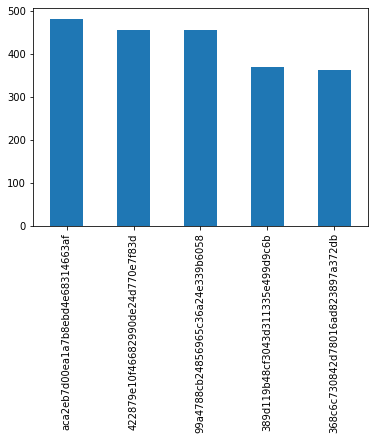

In [189]:
pd.value_counts(dataset2['product_ids']).plot.bar()

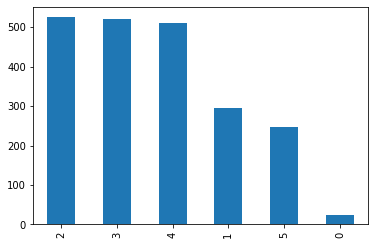

In [188]:
pd.value_counts(dataset2['seller_quality_score']).plot.bar()